# Training Models

In  this  chapter  we  will  start  by  looking  at  the  Linear  Regression  model,  one  of  the simplest models there is. We will discuss two very different ways to train it:

- Using a direct “closed-form” equation that directly computes the model parameters  that  best  fit  the  model  to  the  training  set  (i.e.,  the  model  parameters  that minimize the cost function over the training set).

- Using  an  iterative  optimization  approach  called  Gradient  Descent  (GD)  that gradually  tweaks  the  model  parameters  to  minimize  the  cost  function  over  thetraining  set,  eventually  converging  to  the  same  set  of  parameters  as  the  firstmethod. We will look at a few variants of Gradient Descent that we will use againand again when we study neural networks: Batch GD, Mini-batch GD,and Stochastic GD.

Next we will look at Polynomial Regression, a more complex model that can fit non‐linear  datasets.  Since  this  model  has  more  parameters  than  Linear  Regression,  it  is more prone to overfitting the training data, so we will look at how to detect whether or not this is the case using learning curves, and then we will look at several regularization techniques that can reduce the risk of overfitting the training set. Finally,  we  will  look  at  two  more  models  that  are  commonly  used  for  classification tasks: 

- Logistic Regression and 
- Softmax Regression.

## Linear Regression



The general linera regression eqn can be represented as:

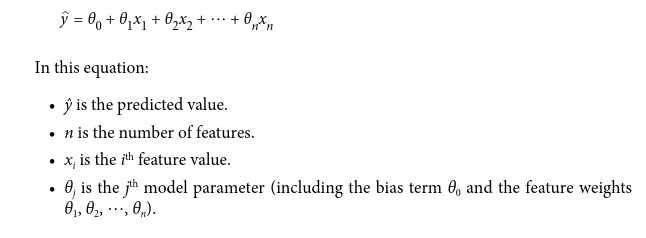

Representing in vectorized form:

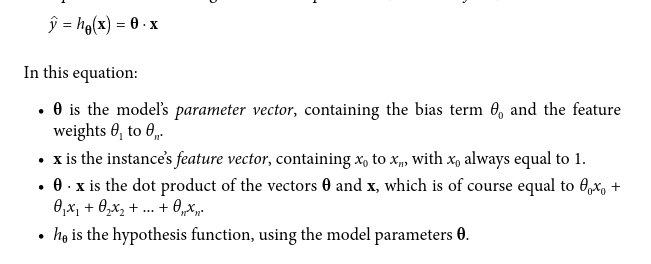

For error calculation we generally Mean Squared Error, mathematically:

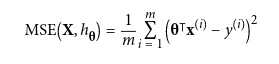

To  simplify  notations,  we  will  just  write  MSE(θ) instead of MSE(X, hθ).

### The Normal Equation

To find the value of θ that minimizes the cost function, there is a closed-form solution in other words, a mathematical equation that gives the result directly. This is called the Normal Equation:

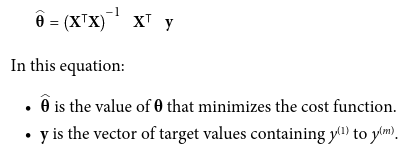

Let’s generate some linear-looking data.

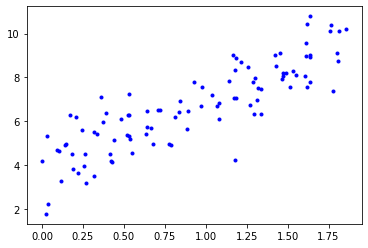

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.show()

Now let’s compute θ using the Normal Equation. We will use the *inv()* function from NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix, andthe *dot()* method for matrix multiplication. **!!! θ-cap is represented as θ**

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The  function  that  we  used  to  generate  the  data  is  y  =  4  +  3x1  +  Gaussian  noise.  Let’s see what the equation found:

In [3]:
theta_best

array([[3.90414426],
       [2.98834476]])

We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.069 and θ1 = 2.900. Close enough, but the noise made it impossible to recover the exact parameters of the original function.

Now, we can make predictions using θ.

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.90414426],
       [9.88083378]])

Let's plot the model's predictions.

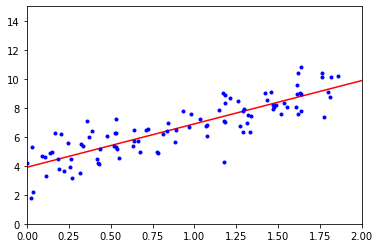

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Performing Linear Regression using Scikit-Learn is simple too.

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.90414426]), array([[2.98834476]]))

The  *LinearRegression*  class  is  based  on  the  *scipy.linalg.lstsq()*  function  (the name stands for “least squares”), which we could call directly.|

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.90414426],
       [2.98834476]])

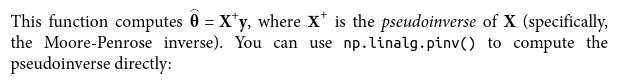

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[3.90414426],
       [2.98834476]])

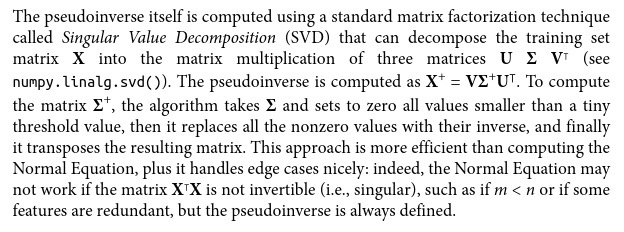

### Computational Complexity

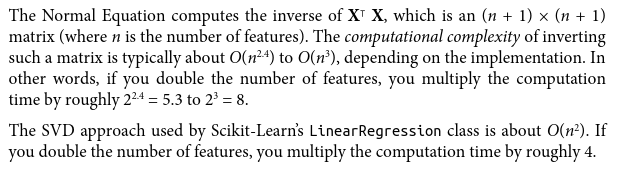

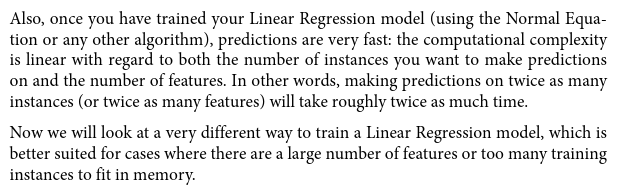

### Gradient Descent

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions  to  a  wide  range  of  problems.  The  general  idea  of  Gradient  Descent  is  to  tweak parameters iteratively in order to minimize a cost function.
<br/>
Concretely, you start by filling θ with random values (this is called random initializa‐tion).  Then  you  improve  it  gradually,  taking  one  baby  step  at  a  time,  each  stepattempting to decrease the cost function (e.g., the MSE), until the algorithm convergesto a minimu.

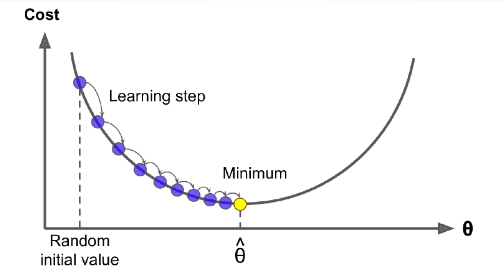

Gradient Descent can sometime stuck in local minima but fortunately,  the  MSE  cost  function  for  a  Linear  Regression  model  happens  to  be  aconvex  function,  which  means  that  if  you  pick  any  two  points  on  the  curve,  the  line segment  joining  them  never  crosses  the  curve.  This  implies  that  there  are  no  local minima,  just  one  global  minimum.  It  is  also  a  continuous  function  with  a  slope  that never changes abruptly( Technically speaking, its derivative is Lipschitz continuous). These two facts have a great consequence: Gradient Descentis  guaranteed  to  approach  arbitrarily  close  the  global  minimum  (if  you  wait  long enough and if the learning rate is not too high).
<br/>
When  using  Gradient  Descent,  you  should  ensure  that  all  features have  a  similar  scale  (e.g.,  using  Scikit-Learn’s  StandardScalerclass), or else it will take much longer to converge.

### Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function  with  regard  to  each  model  parameter  θj.  In  other  words,  you  need  to  calculate how much the cost function will change if you change θj just a little bit. This is calleda partial derivative. It is like asking “What is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all otherd imensions, if you can imagine a universe with more than three dimensions).

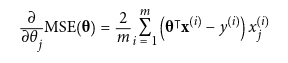

Instead of computing these partial derivatives individually, you can use Equation below to compute them all in one go. The gradient vector, noted ∇θMSE(θ), contains all the partial derivatives of the cost function (one for each model parameter).

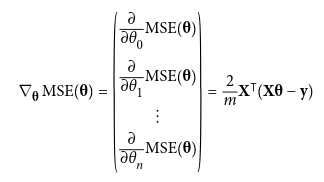

Notice that this formula involves calculations over the full training set  X,  at  each  Gradient  Descent  step!  This  is  why  the  algorithm  is called  Batch  Gradient  Descent:  it  uses  the  whole  batch  of  training data  at  every  step  (actually,  Full  Gradient  Descent  would  probablybe a better name). As a result it is terribly slow on very large training  sets  (but  we  will  see  much  faster  Gradient  Descent  algorithmsshortly). However, Gradient Descent scales well with the number of features;  training  a  Linear  Regression  model  when  there  are  hundreds  of  thousands  of  features  is  much  faster  using  GradientDescent than using the Normal Equation or SVD decomposition.


Once you have the gradient vector, which points uphill, just go in the opposite direction  to  go  downhill.  This  means  subtracting  ∇θMSE(θ)  from  θ.  This  is  where  thelearning  rate  η  comes  into  play: multiply  the  gradient  vector  by  η  to  determine  the size of the downhill step.

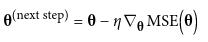

Let’s look at a quick implementation of this algorithm:

In [12]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[3.90414426],
       [2.98834476]])

Hey,  that’s  exactly  what  the  Normal  Equation  found!  Gradient  Descent  worked  perfectly.  But  what  if  you  had  used  a  different  learning  rate  eta?  Figure below  shows  the first 10 steps of Gradient Descent using three different learning rates (the dashed line represents the starting point).

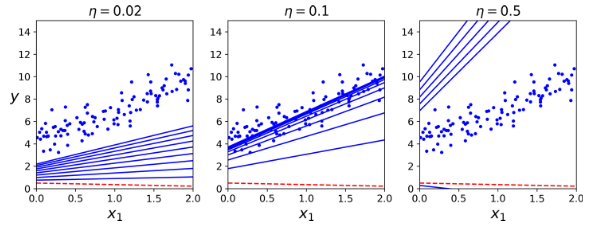

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: injust a few iterations, it has already converged to the solution. On the right, the learning  rate  is  too  high:  the  algorithm  diverges,  jumping  all  over  the  place  and  actually getting further and further away from the solution at every step.To  find  a  good  learning  rate,  you  can  use  grid  search.  However,  youmay  want  to  limit  the  number  of  iterations  so  that  grid  search  can  eliminate  models that take too long to converge. You may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops; but if it is too high, you will  waste  time  while  the  model  parameters  do  not  change  anymore.  A  simple  solution is to set a very large number of iterations but to interrupt the algorithm when thegradient  vector  becomes  tiny that  is,  when  its  norm  becomes  smaller  than  a  tinynumber  ε  (called  the  tolerance) because  this  happens  when  Gradient  Descent  has (almost) reached the minimum.

### Stochastic Gradient Descent

The  main  problem  with  Batch  Gradient  Descent  is  the  fact  that  it  uses  the  whole training  set  to  compute  the  gradients  at  every  step,  which  makes  it  very  slow  when the  training  set  is  large.  At  the  opposite  extreme,  Stochastic  Gradient  Descent  picks  a random  instance  in  the  training  set  at  every  step  and  computes  the  gradients  based only on that single instance. Obviously, working on a single instance at a time makesthe algorithm much faster because it has very little data to manipulate at every iteration.  It  also  makes  it  possible  to  train  on  huge  training  sets,  since  only  one  instance needs  to  be  in  memory  at  each  iteration  (Stochastic  GD  can  be  implemented  as  an out-of-core algorithm). On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the  minimum,  the  cost  function  will  bounce  up  and  down,  decreasing  only  on  average. Over time it will end up very close to the minimum, but once it gets there it will continue  to  bounce  around,  never  settling  down.  So  once  the  algorithm stops, the final parameter values are good, but not optimal.

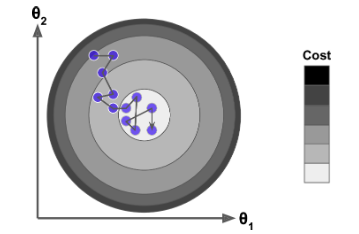

When the cost function is very irregular, this can actually help the algorithm  jump  out  of  local  minima,  so  Stochastic  Gradient  Descent  has  a  better chance of finding the global minimum than Batch Gradient Descent does.


Therefore, randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma isto  gradually  reduce  the  learning  rate.  The  steps  start  out  large  (which  helps  makequick  progress  and  escape  local  minima),  then  get  smaller  and  smaller,  allowing  the algorithm  to  settle  at  the  global  minimum.  This  process  is  akin  to  simulated  annealing, an algorithm inspired from the process in metallurgy of annealing, where molten metal  is  slowly  cooled  down.  The  function  that  determines  the  learning  rate  at  each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the  learning  rate  is  reduced  too  slowly,  you  may  jump  around  the  minimum  for  along time and end up with a sub optimal solution if you halt training too early.

This code implements Stochastic Gradient Descent using a simple learning schedule: